In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skimage
import torch

from resnet_pytorch import ResNet
from skimage.transform import resize
from tensorflow import keras
from keras.models import Model
from tensorflow.keras import layers


In [2]:
#load data with function(define function)
train_dir = "C:/Users/USER/Desktop/633 Proj2/data/Monkey Database/training/training/"
test_dir =  "C:/Users/USER/Desktop/633 Proj2/data/Monkey Database/validation/validation/"
from tqdm import tqdm

def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    
    print("Fetching data from:", folder);
    for folderName in os.listdir(folder):
        
        if not folderName.startswith('.'):
            if folderName in ['n0']:
                label = 0
            elif folderName in ['n1']:
                label = 1
            elif folderName in ['n2']:
                label = 2
            elif folderName in ['n3']:
                label = 3
            elif folderName in ['n4']:
                label = 4
            elif folderName in ['n5']:
                label = 5
            elif folderName in ['n6']:
                label = 6
            elif folderName in ['n7']:
                label = 7
            elif folderName in ['n8']:
                label = 8
            elif folderName in ['n9']:
                label = 9
            else:
                label = 10
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (150, 150, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y


In [3]:
## load data
os.environ['KMP_DUPLICATE_LIB_OK']='True'
X_train, y_train = get_data(train_dir)
X_test, y_test= get_data(test_dir)
print("Data Fetch complete");


Fetching data from: C:/Users/USER/Desktop/633 Proj2/data/Monkey Database/training/training/


100%|████████████████████████████████████████████████████████████████████████████████| 106/106 [02:17<00:00,  1.30s/it]


Fetching data from: C:/Users/USER/Desktop/633 Proj2/data/Monkey Database/validation/validation/


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:40<00:00,  1.56s/it]

Data Fetch complete


Shape of X_train: (1098, 150, 150, 3)
Shape of y_train: (1098,)
Shape of X_test: (272, 150, 150, 3)
Shape of y_test: (272,)


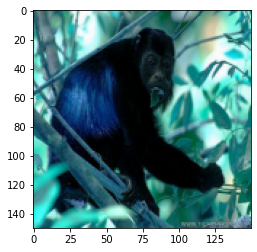

In [4]:
print("Shape of X_train:", np.shape(X_train));
print("Shape of y_train:", np.shape(y_train));
print("Shape of X_test:", np.shape(X_test));
print("Shape of y_test:", np.shape(y_test));

plt.imshow(X_train[0])
plt.show()

# X_train = X_train.astype("float32")
# X_test = X_test.astype("float32")
# y_train = y_train.astype("float32")
# y_test = y_test.astype("float32")

In [5]:
%%time
##reshape data into one color
color = 3;
training_data = 1098*[150*[150*[0]]];
for i in range(1098):
    for j in range(150):
        for k in range(150):
            total = 0;
            for l in range(color):
                total = total + X_train[i][j][k][l];
            training_data[i][j][k] = total/color;

testing_data = 272*[150*[150*[0]]];
for i in range(270):
    for j in range(150):
        for k in range(150):
            total = 0;
            for l in range(color):
                total = total + X_test[i][j][k][l];
            testing_data[i][j][k] = total/color;

print("Shape of X_train:", np.shape(training_data));
print("Shape of X_test:", np.shape(testing_data));
    

Shape of X_train: (1098, 150, 150)
Shape of X_test: (272, 150, 150)
Wall time: 3min 44s


In [6]:
training_data = np.array(training_data);
testing_data = np.array(testing_data);
print(training_data[0]);

[[0.2879695  0.28622222 0.28532898 ... 0.6745098  0.32484967 0.41830501]
 [0.2879695  0.28622222 0.28532898 ... 0.6745098  0.32484967 0.41830501]
 [0.2879695  0.28622222 0.28532898 ... 0.6745098  0.32484967 0.41830501]
 ...
 [0.2879695  0.28622222 0.28532898 ... 0.6745098  0.32484967 0.41830501]
 [0.2879695  0.28622222 0.28532898 ... 0.6745098  0.32484967 0.41830501]
 [0.2879695  0.28622222 0.28532898 ... 0.6745098  0.32484967 0.41830501]]


In [7]:
##normalizing data
training_data = tf.keras.utils.normalize(training_data, axis=1);
testing_data = tf.keras.utils.normalize(testing_data, axis=1);
X_train = tf.keras.utils.normalize(X_train, axis=1);
X_test = tf.keras.utils.normalize(X_test, axis=1);

In [15]:
# ##construct a 5 layer CNN model
model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Flatten()) ##input layer
##128 nurons per layer, activation function
model_cnn.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))  
#model_cnn.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu)) 
model_cnn.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
model_cnn.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) 

print(type(model_cnn));
model_cnn.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model_cnn.fit(training_data, y_train, epochs=25, steps_per_epoch = 1098//32);


<class 'keras.engine.sequential.Sequential'>
Epoch 1/25
34/34 [==============================] - 1s 16ms/step - loss: 2.8861 - accuracy: 0.0911
Epoch 2/25
34/34 [==============================] - 1s 15ms/step - loss: 2.4271 - accuracy: 0.0874
Epoch 3/25
34/34 [==============================] - 1s 15ms/step - loss: 2.3543 - accuracy: 0.0984
Epoch 4/25
34/34 [==============================] - 1s 15ms/step - loss: 2.3421 - accuracy: 0.0920
Epoch 5/25
34/34 [==============================] - 1s 15ms/step - loss: 2.3123 - accuracy: 0.1002
Epoch 6/25
34/34 [==============================] - 1s 15ms/step - loss: 2.3118 - accuracy: 0.1047
Epoch 7/25
34/34 [==============================] - 1s 15ms/step - loss: 2.3053 - accuracy: 0.1166
Epoch 8/25
34/34 [==============================] - 1s 15ms/step - loss: 2.3060 - accuracy: 0.1075
Epoch 9/25
34/34 [==============================] - 1s 15ms/step - loss: 2.3037 - accuracy: 0.1111
Epoch 10/25
34/34 [==============================] - 1s 15ms/ste

In [16]:
val_loss, val_acc = model_cnn.evaluate(testing_data,y_test)
print(val_loss, val_acc)

9/9 [==============================] - 0s 6ms/step - loss: 2.3017 - accuracy: 0.1103
2.301654577255249 0.11029411852359772


In [10]:
##pop the last layer 
model_cnn.summary();
model_cnn.pop();  ##discard the last layer
model_cnn.summary();  

for layer in model_cnn.layers:  ##we freeze the previously trained CNN model
    layer.trainable = False;
model_cnn.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 22500)             0         
                                                                 
 dense (Dense)               (None, 1024)              23041024  
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 23,173,514
Trainable params: 23,173,514
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)      

In [8]:
##inttroduce the VGG model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model, Sequential
# Although this part can be done also with the functional API, I found that for this simple models, this becomes more intuitive
from keras.applications import vgg16
model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3), pooling="max")

for layer in model.layers[:-3]: #set the last five layers trainable
        layer.trainable = False
# for layer in model.layers:
#     print(layer, layer.trainable)
transfer_model = Sequential()
for layer in model.layers:
    transfer_model.add(layer)
    
transfer_model.add(Dense(512, activation="relu"))  # Very important to use relu as activation function, search for "vanishing gradiends" :)
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(10, activation="softmax")) ##the output of the data 10 categories
transfer_model.summary();



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 37, 37, 256)       2

In [13]:
from keras import optimizers
# adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)

transfer_model.compile(optimizer='adam', 
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])
transfer_predict = transfer_model.fit(X_train, y_train, batch_size = 32, epochs = 50, steps_per_epoch = 1098//32)

Epoch 1/50
68/68 [==============================] - 16s 206ms/step - loss: 2.3020 - accuracy: 0.1110
Epoch 2/50
68/68 [==============================] - 14s 203ms/step - loss: 2.3019 - accuracy: 0.1112
Epoch 3/50
68/68 [==============================] - 14s 204ms/step - loss: 2.3017 - accuracy: 0.1074
Epoch 4/50
68/68 [==============================] - 14s 205ms/step - loss: 2.3019 - accuracy: 0.1126
Epoch 5/50
68/68 [==============================] - 14s 209ms/step - loss: 2.3014 - accuracy: 0.1112
Epoch 6/50
68/68 [==============================] - 14s 205ms/step - loss: 2.3016 - accuracy: 0.1140
Epoch 7/50
68/68 [==============================] - 14s 207ms/step - loss: 2.3019 - accuracy: 0.1140
Epoch 8/50
68/68 [==============================] - 14s 205ms/step - loss: 2.3024 - accuracy: 0.1027
Epoch 9/50
68/68 [==============================] - 14s 206ms/step - loss: 2.3018 - accuracy: 0.1144
Epoch 10/50
68/68 [==============================] - 14s 208ms/step - loss: 2.3015 - accura

In [10]:
val_loss, val_acc = transfer_model.evaluate(X_test,y_test)
print(val_loss, val_acc)

9/9 [==============================] - 5s 559ms/step - loss: 2.3016 - accuracy: 0.1103
2.3016040325164795 0.11029411852359772
